In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
def solve_numerical_method(r, S0, K, T, sigma, beta, M, N, theta):
    Smin = 0.2 * S0
    Smax = 4 * S0

    dS = (Smax - Smin) / N
    dt = T / M

    S = np.linspace(Smin, Smax, N+1)

    L = np.zeros((N+1, N+1))
    L[0, 0] = 1
    for i in range(1, N):
        L[i, i-1] = (1 - theta) * (-(r * S[i]) / (2 * dS) + sigma ** 2 / (2 * dS ** 2) * (S[i] ** (2 * beta)))
        L[i, i] = -1 / dt + (1 - theta) * (-sigma ** 2 / (dS ** 2) * (S[i] ** (2 * beta)) - r)
        L[i, i+1] = (1 - theta) * ((r * S[i]) / (2 * dS) + sigma ** 2 / (2 * dS ** 2) * (S[i] ** (2 * beta)))
    L[-1, -1] = 1

    R = np.zeros((N+1, N+1))
    for i in range(1, N):
        R[i, i-1] = (-theta) * (-(r * S[i]) / (2 * dS) + sigma ** 2 / (2 * dS ** 2) * (S[i] ** (2 * beta)))
        R[i, i] = -1 / dt + (-theta) * (-sigma ** 2 / (dS ** 2) * (S[i] ** (2 * beta)) - r)
        R[i, i+1] = (-theta) * ((r * S[i]) / (2 * dS) + sigma ** 2 / (2 * dS ** 2) * (S[i] ** (2 * beta)))

    f = np.zeros(N+1)
    for i in range(N+1):
        f[i] = 1 if (S[i] > K) else 0

    rhs = np.zeros(N+1)
    bc = np.zeros(N+1)
    for j in range(M, 0, -1):
        bc[0] = 0
        bc[-1] = np.exp(-r * (T - (j - 1) * dt))
        rhs = np.matmul(R, f)
        rhs = np.add(rhs, bc)
        f = np.linalg.solve(L, rhs)

    return S, f

In [22]:
def convergence_test(r, S0, K, T, sigma, beta, M, N_list, theta):
    errors = []
    f_prev = None
    for N_curr in N_list:
        S_curr, f_curr = solve_numerical_method(r, S0, K, T, sigma, beta, M, N_curr, theta)
        if f_prev is not None:
            f_prev_interp = np.interp(S_curr, S_prev, f_prev)
            errors.append(np.linalg.norm(abs(f_curr - f_prev_interp), np.inf))
        S_prev, f_prev = S_curr, f_curr
    # Estimate convergence rate
    convergence_rates = [np.log2(abs(errors[i] / errors[i-1])) for i in range(1, len(errors))]
    return errors, convergence_rates

In [23]:
r = 0.001
S0 = 1
K = 1
T = 1
sigma = 0.4
beta = 0.5
M = 1000
N_list = [16,32,64,128,256,512,1024]
theta = 0.5

errors, convergence_rates = convergence_test(r, S0, K, T, sigma, beta, M, N_list, theta)

Estimated convergence rates:
[-1.0575027812686182, -1.034771722315486, -0.9994625147665985, -1.0071898772720362, -1.0035870272770169]


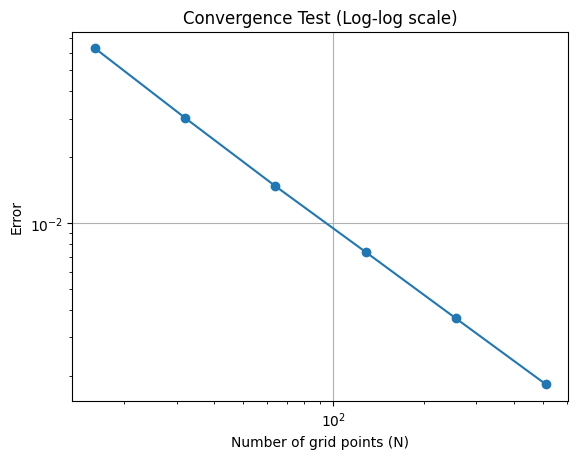

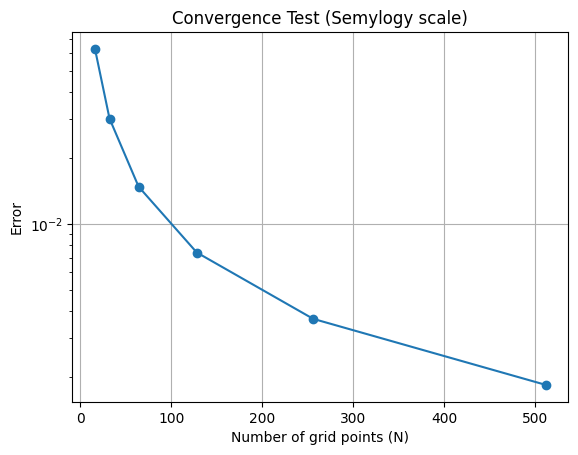

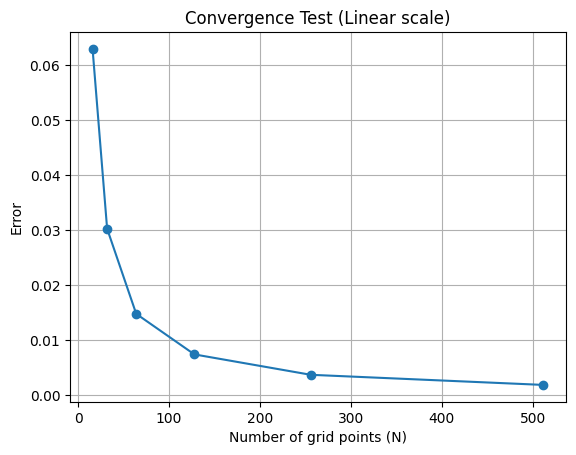

In [24]:
# Print dell'ordine di convergenza q
print("Estimated convergence rates:")
print(convergence_rates)

# Plot degli errori log-log
plt.loglog(N_list[:-1], errors, marker='o', linestyle='-')
plt.title('Convergence Test (Log-log scale)')
plt.xlabel('Number of grid points (N)')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Plot degli errori semylogy
plt.semilogy(N_list[:-1], errors, marker='o', linestyle='-')
plt.title('Convergence Test (Semylogy scale)')
plt.xlabel('Number of grid points (N)')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Plot degli errori
plt.plot(N_list[:-1], errors, marker='o', linestyle='-')
plt.title('Convergence Test (Linear scale)')
plt.xlabel('Number of grid points (N)')
plt.ylabel('Error')
plt.grid(True)
plt.show()

